<a href="https://colab.research.google.com/github/Natakorn-L/Python-for-investing/blob/main/Bitcoin_halving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-3-5ee192a99dc9>:31: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  bitcoin_data = bitcoin_data.groupby('Halving').apply(calculate_diff)


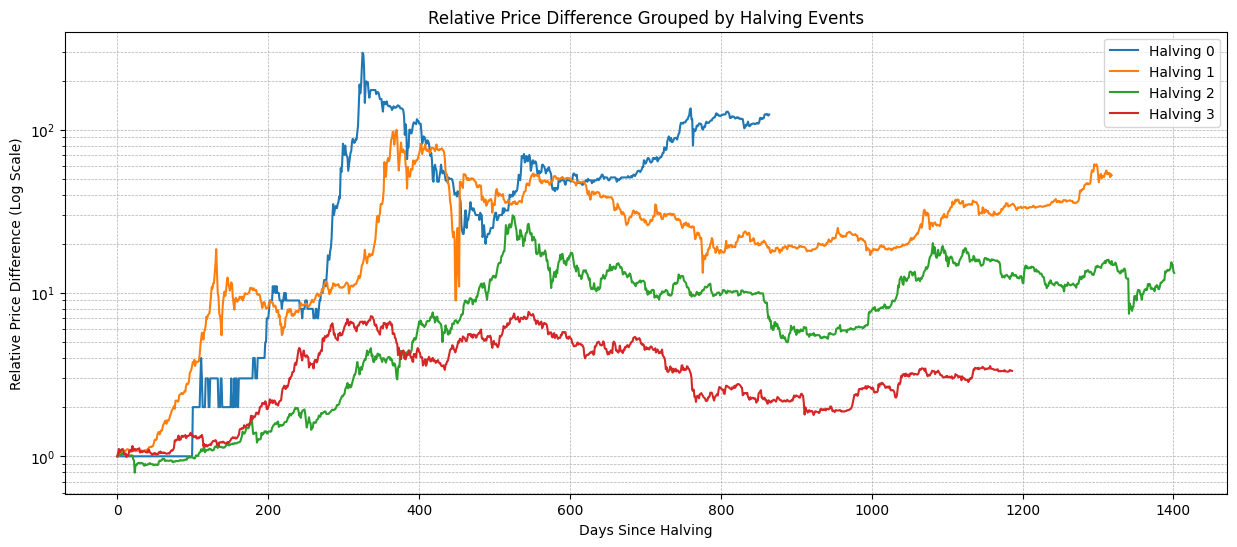

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Loading the CSV file
file_path = "/content/Bitcoin_from_start.csv"
bitcoin_data = pd.read_csv(file_path)

# Defining the Bitcoin halving dates
halving_dates = ['Nov 28, 2012', 'Jul 9, 2016', 'May 11, 2020']

# Converting the 'Date' column to datetime format
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])

# Adding a new column 'Halving' to categorize the data based on halving dates
bitcoin_data['Halving'] = 0
bitcoin_data.loc[bitcoin_data['Date'] > halving_dates[0], 'Halving'] = 1
bitcoin_data.loc[bitcoin_data['Date'] > halving_dates[1], 'Halving'] = 2
bitcoin_data.loc[bitcoin_data['Date'] > halving_dates[2], 'Halving'] = 3

# Converting the 'Price' column to float
bitcoin_data['Price'] = bitcoin_data['Price'].replace(',', '', regex=True).astype(float)

# Function to calculate the relative difference in price
def calculate_diff(group):
    halving_num = group['Halving'].iloc[0]
    group[f'Diff{halving_num}'] = group['Price'] / group['Price'].iloc[0]
    return group

# Applying the function to each halving group
bitcoin_data = bitcoin_data.groupby('Halving').apply(calculate_diff)

# Plotting the relative difference in price for each halving group, with the index reset and log scale
plt.figure(figsize=(15, 6))
for halving, group in bitcoin_data.groupby('Halving'):
    group.reset_index(drop=True, inplace=True)
    plt.plot(group[f'Diff{halving}'], label=f'Halving {halving}')
plt.xlabel('Days Since Halving')
plt.ylabel('Relative Price Difference (Log Scale)')
plt.yscale('log')
plt.title('Relative Price Difference Grouped by Halving Events')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()
